In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
import matplotlib.patches as p
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.linear_model import SGDClassifier

---
## **Q.1)**

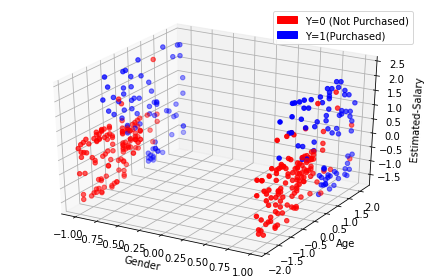

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')   
x1 = np.array(data['Gender'])

#converting male string to value 0 and female to 1
for i in range(len(x1)):
  if x1[i]=='Male':
    x1[i]=0                         
  else:
    x1[i]=1

x1 = x1.astype(int)

x2 = np.array(data['Age'])
x3 = np.array(data['EstimatedSalary'])

y = np.array(data['Purchased'])

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')  

x1 = (x1-np.mean(x1))/np.std(x1)
x2 = (x2-np.mean(x2))/np.std(x2)
x3 = (x3-np.mean(x3))/np.std(x3)

colormap = np.array(['r','b'])
img = ax.scatter(x1,x2,x3, c=colormap[y])
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Estimated-Salary')
redp = p.Patch(color='r',label = 'Y=0 (Not Purchased)')
blue = p.Patch(color = 'b',label = 'Y=1(Purchased)')
plt.legend(handles = [redp,blue])
fig.tight_layout()

In [ ]:
#sigmoid funtion:
def sigmoid(theta, x):
  temp = (-1)*np.matmul(theta.T,x)
  h = 1/(1+np.exp(temp))
  return h

In [ ]:
#function to calculate partial diff w.r.t thetaj

def calculate_grad(x,y,h,j):
  grad = 0
  for i in range(len(x)):
    grad+=(h[i]-y[i])*x[i][j]
  return grad

In [ ]:
#function which performs gradient descent and returns theta vector
def gradient_desent(x,y,theta):
    alpha=0.01;
    grad = np.ones((len(theta),1))
    epsilon = 1e-3
    while np.sqrt(np.matmul(grad.T,grad))>=epsilon:       #converging condition
      h = np.ones((len(x),1))
      for j in range(len(x)):
        h[j] = sigmoid(theta,x[j].T)
      for j in range(len(theta)):
        grad[j][0] = calculate_grad(x,y,h,j)
      for i in range(len(theta)):
        theta[i] = theta[i] - alpha*grad[i][0]
    return theta

In [ ]:
#teting on implemented logistic regression

data = pd.read_csv('Social_Network_Ads.csv')   
x1 = np.array(data['Gender'])

#converting male string to value 0 and female to 1
for i in range(len(x1)):
  if x1[i]=='Male':
    x1[i]=0                         
  else:
    x1[i]=1

x1 = x1.astype(int)

x2 = np.array(data['Age'])
x3 = np.array(data['EstimatedSalary'])

y = np.array(data['Purchased'])

x1 = (x1-np.mean(x1))/np.std(x1)
x2 = (x2-np.mean(x2))/np.std(x2)
x3 = (x3-np.mean(x3))/np.std(x3)

x=np.c_[np.ones((len(x1),1)),x1,x2,x3]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

theta = np.ones((4,1))
theta = gradient_desent(x_train,y_train,theta)

theta

array([[-1.17393012],
       [-0.10739682],
       [ 2.38106448],
       [ 1.28462762]])

In [ ]:
#test data-set
y_predicted = np.ones(len(y_test))
for i in range(len(x_test)):
  s = sigmoid(theta, x_test[i])
  if s>=0.5:
    y_predicted[i]=1
  else:
    y_predicted[i]=0

confusion_mat = np.zeros((2,2))
for i in range(len(y_predicted)):
  if y_predicted[i]==y_test[i]:
    if y_test[i]==0:
      confusion_mat[0][0]+=1
    else:
      confusion_mat[1][1]+=1
  else:
    if y_predicted[i]==0:
      confusion_mat[0][1]+=1
    else:
      confusion_mat[1][0]+=1

#printing confusion-matrix
conf = {'': ['Predicted_0','Predicted_1'],'Actual_0':  confusion_mat[:,0], 'Actual_1': confusion_mat[:,1]}
df = pd.DataFrame (conf, columns = ['','Actual_0','Actual_1'])
df

,,Actual_0,Actual_1
0,Predicted_0,24.0,6.0
1,Predicted_1,2.0,8.0


In [ ]:
#calculating the matrices


print('Accuracy:', accuracy_score(y_test,y_predicted))

print('Precision:',precision_score(y_test,y_predicted))

print('Recall:',recall_score(y_test,y_predicted))

print('F1 Score:', f1_score(y_test,y_predicted))

Accuracy: 0.8
Precision: 0.8
Recall: 0.5714285714285714
F1 Score: 0.6666666666666666


In [ ]:
x_train = np.delete(x_train,0,1)

In [ ]:
x_test = np.delete(x_test,0,1)

In [ ]:
#using library function

clf = LogisticRegression().fit(x_train, y_train)
y_predicted = clf.predict(x_test)

confusion_mat = np.zeros((2,2))
for i in range(len(y_predicted)):
  if y_predicted[i]==y_test[i]:
    if y_test[i]==0:
      confusion_mat[0][0]+=1
    else:
      confusion_mat[1][1]+=1
  else:
    if y_predicted[i]==0:
      confusion_mat[0][1]+=1
    else:
      confusion_mat[1][0]+=1

#printing confusion-matrix
conf = {'': ['Predicted_0','Predicted_1'],'Actual_0':  confusion_mat[:,0], 'Actual_1': confusion_mat[:,1]}
df = pd.DataFrame (conf, columns = ['','Actual_0','Actual_1'])
df

,,Actual_0,Actual_1
0,Predicted_0,24.0,6.0
1,Predicted_1,2.0,8.0


In [ ]:

print('Accuracy:', accuracy_score(y_test,y_predicted))

print('Precision:',precision_score(y_test,y_predicted))

print('Recall:',recall_score(y_test,y_predicted))

print('F1 Score:', f1_score(y_test,y_predicted))

Accuracy: 0.8
Precision: 0.8
Recall: 0.5714285714285714
F1 Score: 0.6666666666666666


---
## **Q.2)**

In [ ]:
data = pd.read_csv('Iris.csv')   
x1 = np.array(data['SepalLengthCm'])
x2 = np.array(data['SepalWidthCm'])
x3 = np.array(data['PetalLengthCm'])
x4 = np.array(data['PetalWidthCm'])

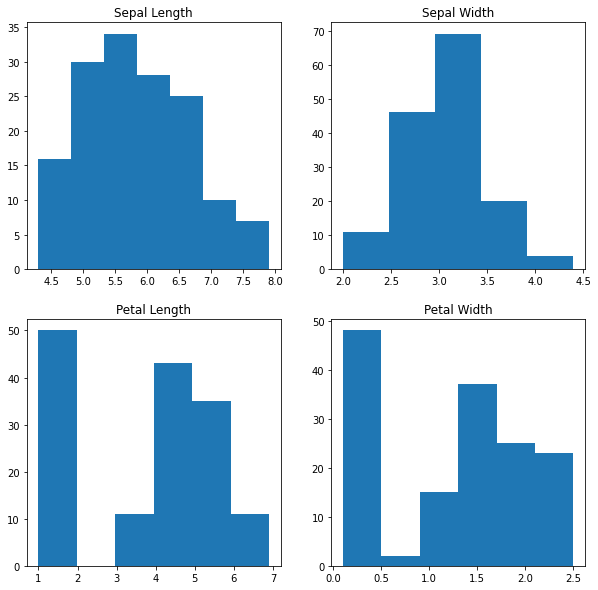

In [ ]:
#plotting feature's histogram
fig, axes = plt.subplots(2, 2, figsize=(10,10))
  
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(x1, bins=7)
  
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(x2, bins=5);
  
axes[1,0].set_title("Petal Length")
axes[1,0].hist(x3, bins=6);
  
axes[1,1].set_title("Petal Width")
axes[1,1].hist(x4, bins=6);

In [ ]:
def fun(x,ax):
  x1_mean = x.mean()
  x1_std = x.std()
  x.sort()
  a1 = ((x-x1_mean)/x1_std)**2
  a1 = a1*(-1)/2
  f = np.exp(a1)
  f = f/np.sqrt(2*np.pi)
  f = f/x1_std
  ax.plot(x,f)

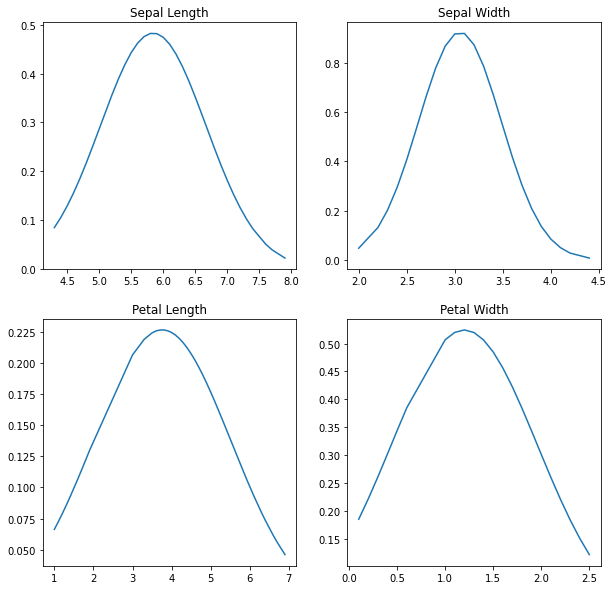

In [ ]:
#plotting pdfs for normal-distributions

fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
fun(x1,axes[0,0])
  
axes[0,1].set_title("Sepal Width")
fun(x2,axes[0,1])
  
axes[1,0].set_title("Petal Length")
fun(x3,axes[1,0])
  
axes[1,1].set_title("Petal Width")
fun(x4,axes[1,1])

In [ ]:
data.groupby('Species').agg(['mean', 'median'])

Id        SepalLengthCm  ... PetalLengthCm PetalWidthCm       
                  mean median          mean  ...        median         mean median
Species                                      ...                                  
Iris-setosa       25.5   25.5         5.006  ...          1.50        0.244    0.2
Iris-versicolor   75.5   75.5         5.936  ...          4.35        1.326    1.3
Iris-virginica   125.5  125.5         6.588  ...          5.55        2.026    2.0

[3 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

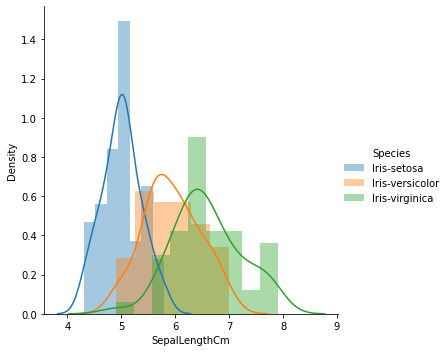

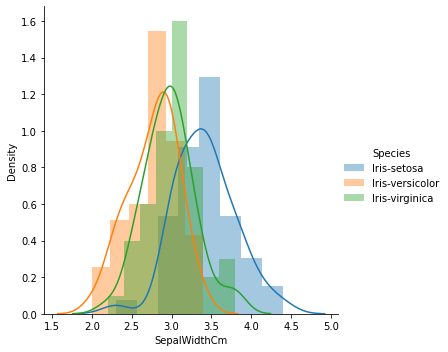

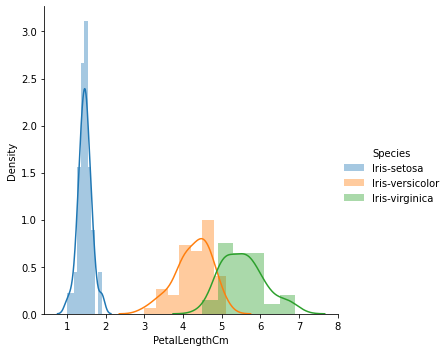

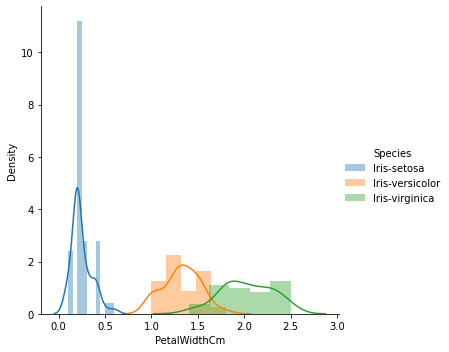

In [ ]:
# sepal length
sb.FacetGrid(data, hue="Species", height=5) \
   .map(sb.distplot, "SepalLengthCm") \
   .add_legend();
# sepal width
sb.FacetGrid(data, hue="Species", height=5) \
   .map(sb.distplot, "SepalWidthCm") \
   .add_legend();
# petal length
sb.FacetGrid(data, hue="Species", height=5) \
   .map(sb.distplot, "PetalLengthCm") \
   .add_legend();
# petal width
sb.FacetGrid(data, hue="Species", height=5) \
   .map(sb.distplot, "PetalWidthCm") \
   .add_legend();
plt.show()

---
## **Q.3)**

In [ ]:
def twoFeature(f1,f2,y,s1,s2):
  fig=plt.figure()
  ax = fig.add_subplot(111) 
  colormap = np.array(['r','g','b'])
  img = ax.scatter(f1,f2, c=colormap[y])
  ax.set_xlabel(s1+'')
  ax.set_ylabel(s2+'')
  redp = p.Patch(color='r',label = 'Iris-setosa')
  green = p.Patch(color = 'g',label = 'Iris-virginica')
  blue = p.Patch(color = 'b',label = 'Iris-versicolor')

  plt.legend(handles = [redp,green,blue])
  fig.tight_layout()

In [ ]:
data = pd.read_csv('Iris.csv')
x1 = np.array(data['PetalLengthCm'])
x2 = np.array(data['PetalWidthCm'])
x3 = np.array(data['SepalLengthCm'])
x4 = np.array(data['SepalWidthCm'])
y = np.array(data['Species'])

j=0
for i in y:
  if i=='Iris-setosa':
    y[j]=0
  if i=='Iris-virginica':
    y[j]=1
  if i=='Iris-versicolor':
    y[j]=2
  j+=1
y = y.astype(int)

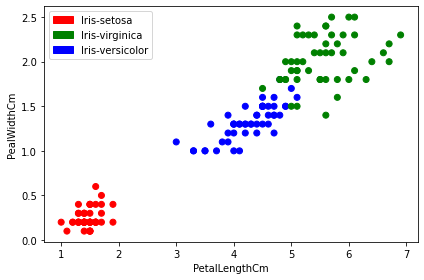

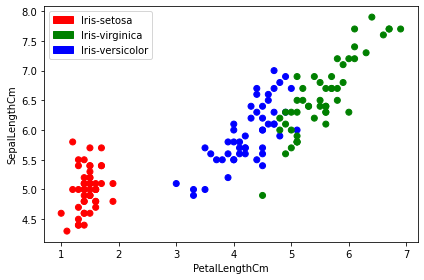

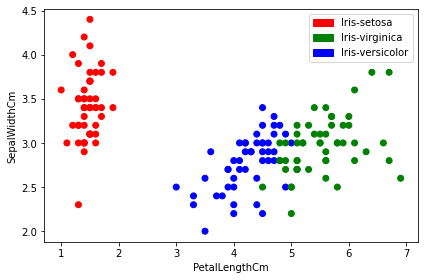

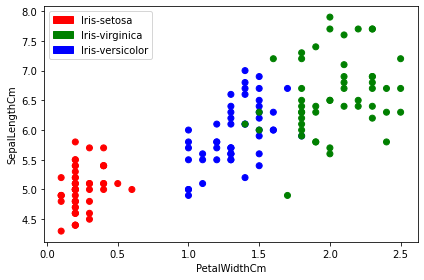

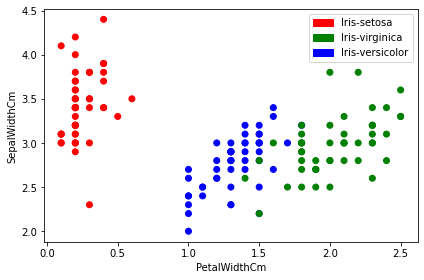

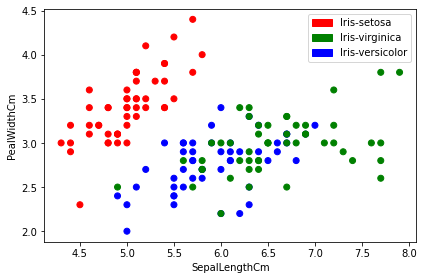

In [ ]:
#plots for all 6-combinations

twoFeature(x1,x2,y,'PetalLengthCm','PealWidthCm')
twoFeature(x1,x3,y,'PetalLengthCm','SepalLengthCm')
twoFeature(x1,x4,y,'PetalLengthCm','SepalWidthCm')
twoFeature(x2,x3,y,'PetalWidthCm','SepalLengthCm')
twoFeature(x2,x4,y,'PetalWidthCm','SepalWidthCm')
twoFeature(x3,x4,y,'SepalLengthCm','PealWidthCm')

---
## **Q.4)**

In [ ]:
data = pd.read_csv('Iris.csv')
x1 = np.array(data['PetalLengthCm'])
x2 = np.array(data['PetalWidthCm'])
x3 = np.array(data['SepalLengthCm'])
x4 = np.array(data['SepalWidthCm'])
y = np.array(data['Species'])

j=0
for i in y:
  if i=='Iris-setosa':
    y[j]=0
  if i=='Iris-virginica':
    y[j]=1
  if i=='Iris-versicolor':
    y[j]=2
  j+=1
y = y.astype(int)

In [ ]:
x1 = (x1-np.mean(x1))/np.std(x1)
x2 = (x2-np.mean(x2))/np.std(x2)
x3 = (x3-np.mean(x3))/np.std(x3)
x4 = (x4-np.mean(x4))/np.std(x4)

x=np.c_[x1,x2,x3,x4]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
def softmax(z):
  z = np.exp(z)
  temp = 0
  for i in z:
    temp+=i
  return z/temp

In [ ]:
def multiclass_logistic_softmax(n,k,x_train,y_train):
  theta = np.ones((n+1,k))
  for i in range(k):
    y_temp = np.ones(len(y_train))
    for j in range(len(y_temp)):
      if y_train[j]!=i:
        y_temp[j] = 0
      else:
        y_temp[j] = 1
    clf = SGDClassifier(tol=1e-6)
    clf.fit(x_train,y_temp)
    theta[0][i]=clf.intercept_
    temp = np.array(clf.coef_)
    for j in range(1,5):
      theta[j][i]=temp[0][j-1]
  return theta

In [ ]:
n = 4
k = 3
theta = multiclass_logistic_softmax(n,k,x_train,y_train)
theta

array([[ -8.83533796, -39.85990519,  -6.20942364],
       [ -8.89647948,  28.2723844 ,  12.27198045],
       [ -7.4483315 ,  28.67130995,  -3.45073412],
       [ -5.33953064,  -2.11028699,   3.18025907],
       [  4.21381943,  -4.46889324,  -7.42325056]])

In [ ]:
x_test2 = np.c_[np.ones(len(x_test)),x_test[:,0],x_test[:,1],x_test[:,2],x_test[:,3]]

In [ ]:
y_predicted = np.zeros(len(y_test))
for i in range(len(x_test)):
  z = np.matmul(theta.T,x_test2[i].T)
  prob = softmax(z)
  ma=0.00
  ans=0
  for j in range(len(z)):
    if z[j]>ma:
      ma=z[j]
      ans=j
  y_predicted[i] = ans
y_predicted = y_predicted.astype(int)

confusion_mat = np.zeros((3,3))
for i in range(len(y_predicted)):
  confusion_mat[y_predicted[i]][y_test[i]]+=1

#printing confusion-matrix
conf = {'': ['Predicted_0','Predicted_1','Predicted_2'],'Actual_0':  confusion_mat[:,0], 'Actual_1': confusion_mat[:,1], 'Actual_2': confusion_mat[:,2]}
df = pd.DataFrame (conf, columns = ['','Actual_0','Actual_1','Actual_2'])
df

,,Actual_0,Actual_1,Actual_2
0,Predicted_0,4.0,0.0,2.0
1,Predicted_1,0.0,4.0,0.0
2,Predicted_2,0.0,1.0,4.0


In [ ]:

print('Accuracy:', accuracy_score(y_test,y_predicted))

print('Precision:',precision_score(y_test,y_predicted,average="weighted"))

print('Recall:',recall_score(y_test,y_predicted,average="weighted"))

print('F1 Score:', f1_score(y_test,y_predicted,average='weighted'))

Accuracy: 0.8
Precision: 0.8311111111111111
Recall: 0.8
F1 Score: 0.8005387205387205


In [ ]:
#using library function

clf = LogisticRegression().fit(x_train, y_train)
y_predicted = clf.predict(x_test)

confusion_mat = np.zeros((3,3))
for i in range(len(y_predicted)):
  confusion_mat[y_predicted[i]][y_test[i]]+=1

#printing confusion-matrix
conf = {'': ['Predicted_0','Predicted_1','Predicted_2'],'Actual_0':  confusion_mat[:,0], 'Actual_1': confusion_mat[:,1], 'Actual_2': confusion_mat[:,2]}
df = pd.DataFrame (conf, columns = ['','Actual_0','Actual_1','Actual_2'])
df

,,Actual_0,Actual_1,Actual_2
0,Predicted_0,4.0,0.0,0.0
1,Predicted_1,0.0,4.0,0.0
2,Predicted_2,0.0,1.0,6.0


In [ ]:

print('Accuracy:', accuracy_score(y_test,y_predicted))

print('Precision:',precision_score(y_test,y_predicted,average="weighted"))

print('Recall:',recall_score(y_test,y_predicted,average="weighted"))

print('F1 Score:', f1_score(y_test,y_predicted,average='weighted'))

Accuracy: 0.9333333333333333
Precision: 0.9428571428571428
Recall: 0.9333333333333333
F1 Score: 0.9321937321937322


---
## **Q.5)**

In [ ]:
#imbalanced dataset
cnt = 25
for i in range(len(y_train)):
  if cnt==0:
    break
  if y_train[i]==2:
    if cnt>15:
      y_train[i]=0
    else:
      y_train[i]=1
    cnt-=1

In [ ]:
clf = LogisticRegression().fit(x_train, y_train)
y_predicted = clf.predict(x_test)

confusion_mat = np.zeros((3,3))
for i in range(len(y_predicted)):
  confusion_mat[y_predicted[i]][y_test[i]]+=1

#printing confusion-matrix
conf = {'': ['Predicted_0','Predicted_1','Predicted_2'],'Actual_0':  confusion_mat[:,0], 'Actual_1': confusion_mat[:,1], 'Actual_2': confusion_mat[:,2]}
df = pd.DataFrame (conf, columns = ['','Actual_0','Actual_1','Actual_2'])
df

,,Actual_0,Actual_1,Actual_2
0,Predicted_0,4.0,0.0,0.0
1,Predicted_1,0.0,5.0,5.0
2,Predicted_2,0.0,0.0,1.0


In [ ]:

print('Accuracy:', accuracy_score(y_test,y_predicted))

print('Precision:',precision_score(y_test,y_predicted,average="weighted"))

print('Recall:',recall_score(y_test,y_predicted,average="weighted"))

print('F1 Score:', f1_score(y_test,y_predicted,average='weighted'))

Accuracy: 0.6666666666666666
Precision: 0.8333333333333334
Recall: 0.6666666666666666
F1 Score: 0.6031746031746031
